In [1]:
from fastai.script import *

from fastai.vision import *

from fastai.callbacks import *

from fastai.distributed import *

from fastai.callbacks.tracker import *

from torchvision.models import vgg16
import os 


数据集收集

In [2]:
path = Path('./data/faces/depth/')
path.ls()

[PosixPath('data/faces/depth/best2_depth_vgg16.txt'),
 PosixPath('data/faces/depth/best0.9983.pkl'),
 PosixPath('data/faces/depth/best0.99854.pkl'),
 PosixPath('data/faces/depth/train-more'),
 PosixPath('data/faces/depth/all_correct_depth_result34.txt'),
 PosixPath('data/faces/depth/train'),
 PosixPath('data/faces/depth/2try_depth_result34.txt'),
 PosixPath('data/faces/depth/free_depth_result34.txt'),
 PosixPath('data/faces/depth/223_depth_result34.txt'),
 PosixPath('data/faces/depth/compare_depth_vgg16_best0.998751.txt'),
 PosixPath('data/faces/depth/export.pkl'),
 PosixPath('data/faces/depth/models'),
 PosixPath('data/faces/depth/best0.9984.pkl'),
 PosixPath('data/faces/depth/best_depth_vgg16.txt'),
 PosixPath('data/faces/depth/depth_result34.txt'),
 PosixPath('data/faces/depth/best.pkl'),
 PosixPath('data/faces/depth/best0.998751.pkl'),
 PosixPath('data/faces/depth/compare_depth_vgg16_0.9983.txt'),
 PosixPath('data/faces/depth/val')]

In [3]:
#path = Path('data/bears')


In [4]:
#path.ls()

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid="val",
        ds_tfms=get_transforms(max_rotate=25, max_zoom=1.3,  max_warp=0.3, max_lighting=0.,
                      p_affine=1., p_lighting=1.), padding_mode='reflection',size=28, bs=1024, num_workers=2).normalize(imagenet_stats)

#max_lighting=0.,

In [6]:
data.classes

['fake', 'true']

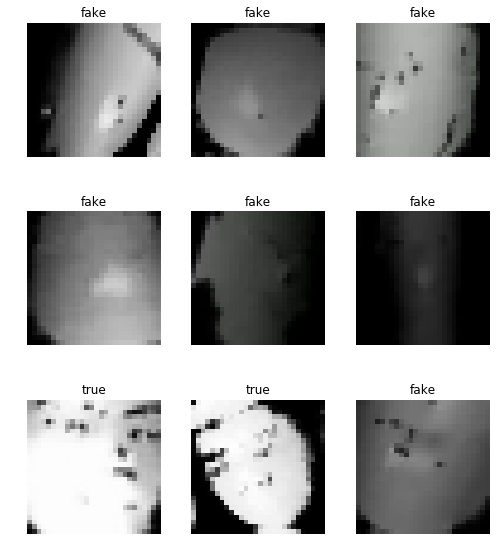

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fake', 'true'], 2, 29266, 9608)

In [9]:
learn = create_cnn(data, vgg16, metrics=accuracy, ps=0.7, bn_final=True)

In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy
1,0.584251,0.377510,0.856474
2,0.510331,0.313093,0.896232
3,0.457794,0.296825,0.904871
4,0.422263,0.292073,0.916424
5,0.401199,0.301278,0.921107


In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(20, max_lr=slice(3e-5,3e-4), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])#1e-6,1e-3 (3e-5,3e-4)

epoch,train_loss,valid_loss,accuracy
1,0.364440,0.298465,0.927040
2,0.348594,0.267667,0.947544
3,0.327501,0.228008,0.975229
4,0.307581,0.217175,0.985325
5,0.290626,0.207048,0.990737
6,0.276815,0.205050,0.993443
7,0.265273,0.201840,0.994692
8,0.255677,0.198958,0.996357
9,0.247884,0.198337,0.996149
10,0.241270,0.200934,0.995525


Better model found at epoch 1 with accuracy value: 0.9270399808883667.
Better model found at epoch 2 with accuracy value: 0.947543740272522.
Better model found at epoch 3 with accuracy value: 0.9752289652824402.
Better model found at epoch 4 with accuracy value: 0.9853247404098511.
Better model found at epoch 5 with accuracy value: 0.9907369017601013.
Better model found at epoch 6 with accuracy value: 0.993442952632904.
Better model found at epoch 7 with accuracy value: 0.9946919083595276.
Better model found at epoch 8 with accuracy value: 0.9963572025299072.
Better model found at epoch 12 with accuracy value: 0.9982306361198425.


In [13]:
#learn.fit_one_cycle(10, max_lr=slice(3e-5,3e-5), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])#1e-6,1e-3 (3e-5,3e-4)

测试验证


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

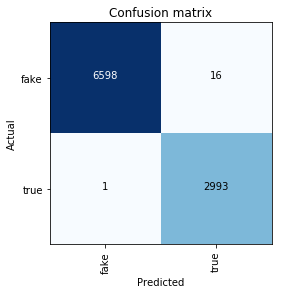

In [15]:
interp.plot_confusion_matrix()

In [16]:
interp.most_confused()

[('fake', 'true', 16), ('true', 'fake', 1)]

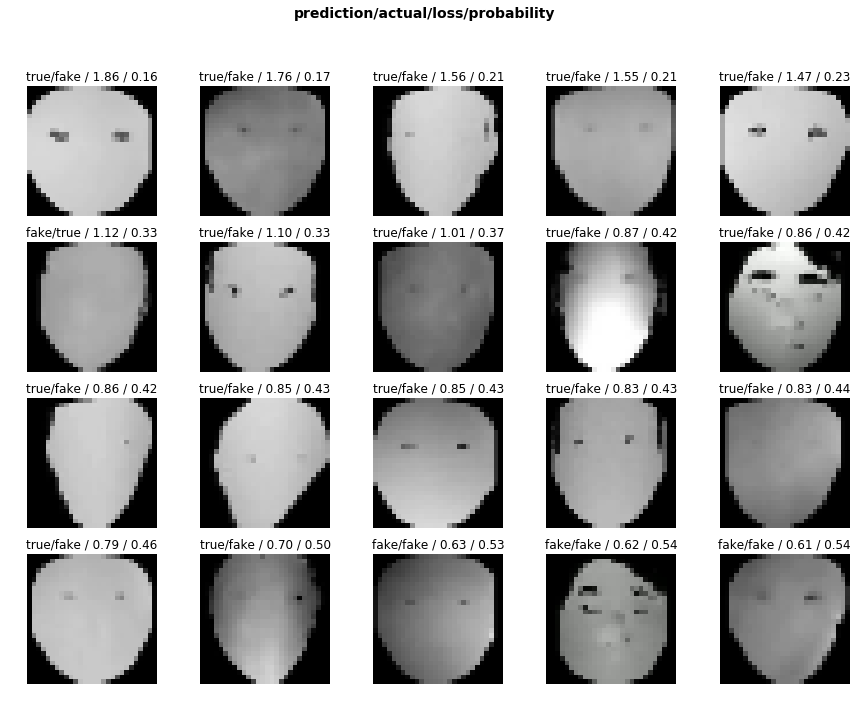

In [17]:
interp.plot_top_losses(20, figsize=(15,11))

In [18]:
learn.load('best');

In [19]:
learn.export('best.pkl')